# [Neurônio de McCulloch-Pitts](https://cin.ufpe.br/~gcv/web_lci/Aula-Perceptrons.pdf)

In [21]:
import numpy
import random
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

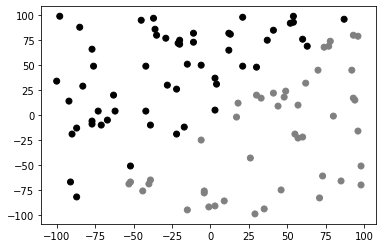

In [77]:
# As amostras serão divididas de modo que quando x >= y, a amostra pertence ao
# grupo 1 e quando x < y a amostra pertence ao grupo -1

label = lambda x, y: 1 if x > y else -1

# Amostragem aleatória

sample = numpy.random.randint(-100, 100, (100, 2))
x, y = zip(*sample)
color_array = ['grey' if x>=y else 'black' for x, y in sample]
scat = plt.scatter(x, y, c=color_array)

## Função de ativação: step

![step_function](https://www.cs.bham.ac.uk/~mmk/Teaching/AI/figures/bipolar-threshold.jpg)

In [23]:
def step(n):
    '''
    Função de ativação
    retorna o sinal do parâmetro n
    '''
    return 1 if n >0 else -1

# Neurônio de McCulloch-Pitts

![perceptron](https://www.deeplearningbook.com.br/wp-content/uploads/2017/12/perceptron.png)

Regra de propagação: $y = f_h [\sum_{i=1}^nw_ix_i - \theta]$

Algoritmo de aprendizagem:

Se um padrão é corretamente classificado:
* $W(t+1) = W(t)$, se $\sum w_ix_i - \theta\geq0$ e $x$ pertence a C1
* $W(t+1) = W(t)$, se $\sum w_ix_i - \theta\lt0$ e $x$ pertence a C2

Se um padrão é incorretamente classificado:
* $W(t+1) = W(t)-\eta x$, se $\sum w_ix_i - \theta\geq0$ e $x$ pertence a C1
* $W(t+1) = W(t)+\eta x$, se $\sum w_ix_i - \theta\lt0$ e $x$ pertence a C2

Usando $\theta=0.5$ e $\eta=0.4$

<!-- Dada uma rede do tipo Perceptron formada por um neurônio com três terminais de entrada, utilizando pesos iniciais $w_0=0.4$, $w_1=-0.6$ e $w_2=0.6$, limiar $\theta=0.5$ e taxa de aprendizado $\eta=0.4$, -->

In [24]:
class Perceptron(object):
    def __init__(self, cardinality = 2, theta = 0.5, etha = 0.4):
        self.weights = numpy.random.uniform(-1, 1, (cardinality,))
        self.theta = theta
        self.etha = etha
    
    def evaluate(self, sample: list):
        _sum = sum([sample[t]*self.weights[t] for t in range(len(sample))]) - self.theta
        return step(_sum)

    def train(self, sample: list, target: int):
        estimate = self.evaluate(sample)
        error = target - estimate # se a estimativa estiver correta, error == 0
        for i in range(len(sample)):
            self.weights[i] += error * self.etha * sample[i]


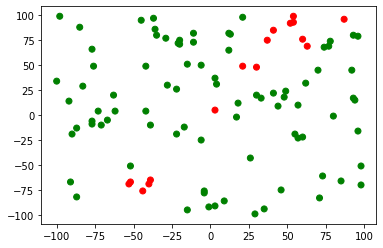

In [109]:
perceptron = Perceptron()
for p in sample:
    target = label(*p)
    perceptron.train(p, target)

color_array = ['green' if label(*p) == perceptron.evaluate(p) else 'red' for p in sample]
scat = plt.scatter(x, y, c=color_array)


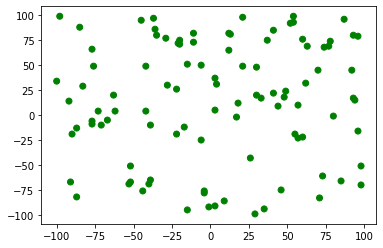

In [110]:
for p in sample:
    target = label(*p)
    perceptron.train(p, target)

color_array = ['green' if label(*p) == perceptron.evaluate(p) else 'red' for p in sample]
scat = plt.scatter(x, y, c=color_array)